In [1]:
# Local
%cd ..
%cd src
import stm_trusssystem as TS
from stm_methods import *
# Global
import numpy as np
import math
import matplotlib.pyplot as plt

/Users/karinyu/Documents/GitHub/StrutandTieModelling
/Users/karinyu/Documents/GitHub/StrutandTieModelling/src


# Example of Helmi Ghourabi

In [2]:
# Use these units: N, mm, MPa
# Generate Points
# outer geometry
P1 = TS.Point(x = 0, y = 0, z = 0) 
P2 = TS.Point(x = 5000, y = 0, z = 0)
P3 = TS.Point(x = 5000, y = 3500, z = 0)
P4 = TS.Point(x = 0, y = 3500, z = 0)
# geometry of the opening
P5 = TS.Point(x = 1000, y = 500, z = 0)
P6 = TS.Point(x = 2000, y = 500, z = 0) 
P7 = TS.Point(x = 2000, y = 2500, z = 0) 
P8 = TS.Point(x = 1000, y = 2500, z = 0) 
# Load Introduction, if you account for stress fields you need to account for a certain distance from the border (c)
c = 50 # mm
P9 = TS.Point(x = 1500, y = 3500-c, z = 0)
P10 = TS.Point(x = 3500, y = 3500-c, z = 0)
# Support locations
P11 = TS.Point(x = c, y = c, z = 0)
P12 = TS.Point(x = 5000-c, y = c, z = 0)
# Define Material
# Material of concrete, Ec, fck, epsilon_c, direction (-1)
matC = TS.Material(30000,20,0.003,-1)
# Material of steel, Es, fsy, epsilon_s, direction (1)
matT = TS.Material(205000,435,0.08,1)
DOF0 = TS.DOF(0,0,0,0,0,0)
# Polygon, clockwise
Polygon = TS.Polygon()
Polygon.addPoint(P1)
Polygon.addPoint(P4)
Polygon.addPoint(P3)
Polygon.addPoint(P2)
# Opening, clockwise
Opening = TS.Polygon()
Opening.addPoint(P5)
Opening.addPoint(P8)
Opening.addPoint(P7)
Opening.addPoint(P6)
# Add nodes
N1 = TS.Node(P11,DOF0) # left support
N2 = TS.Node(P12,DOF0) # right support
N9 = TS.Node(P9,DOF0)
N10 = TS.Node(P10,DOF0)
S1 = TS.Support(N1, TS.DOF(1,1,1,0,0,0))
S2 = TS.Support(N2, TS.DOF(0,1,0,0,0,0))

Make sure that the first material is concrete and the second for steel.
Is strut-and-tie model in equilibrium?  True


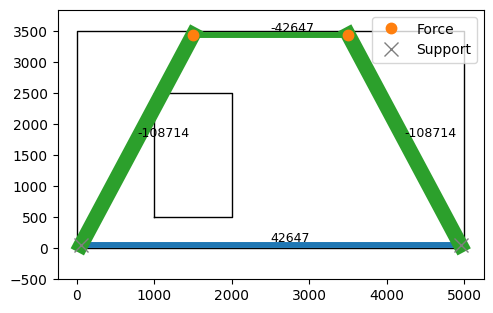

In [3]:
T2 = TS.TrussSystem()
#Search Space - CLOCKWISE
T2.addPolygontoSS(Polygon)
T2.addNode([N1, N2, N9, N10])
T2.addMaterial(matC) # struts
T2.addMaterial(matT) # ties
# Edges
e1 = TS.Edge(N1, N2, matT)
e2 = TS.Edge(N1, N9, matC)
e3 = TS.Edge(N9, N10, matT)
e4 = TS.Edge(N2, N10, matC)
T2.addEdge([e1, e2, e3, e4])
Force1 = TS.Force_ext(N9, [0, -100000, 0, 0, 0, 0], TS.DOF(0, 1, 0, 0, 0, 0))
Force2 = TS.Force_ext(N10, [0, -100000, 0, 0, 0, 0], TS.DOF(0, 1, 0, 0, 0, 0))
T2.addForce(Force1)
T2.addForce(Force2)
# add Supports
T2.addSupport(S1)
T2.addSupport(S2)
T2.solveTruss(True)
T2.plotSTM(fig_size=(5.5,3.5),plot_scale=1e4, polygon_in = [Polygon], polygon_out = [Opening], label_edges = True)
print('Is strut-and-tie model in equilibrium? ', T2.checkEquilibrium())

The maximum hydrostatic stress is assumed as :  20

current node: [50, 50, 0]
Hydrostatic nodal zones are assumed.

current node: [4950, 50, 0]
Hydrostatic nodal zones are assumed.

current node: [1500, 3450, 0]
Hydrostatic nodal zones are assumed.

current node: [3500, 3450, 0]
Hydrostatic nodal zones are assumed.


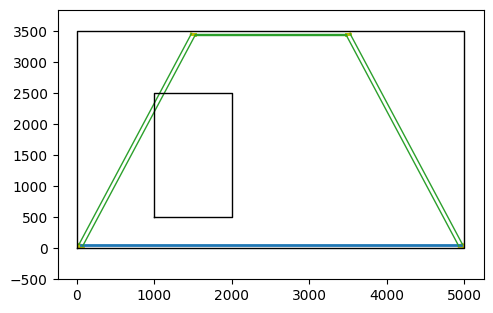

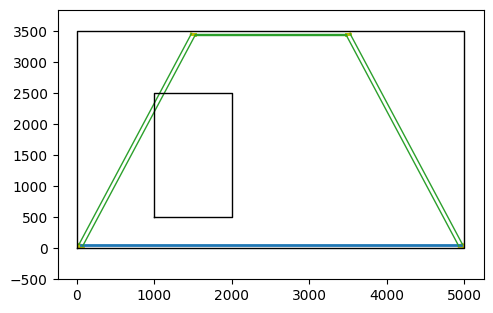

In [4]:
T2.plotStressField(fig_size=(5.5,3.5),t = 100, polygon_in=[Polygon], polygon_out = [Opening], check_disc_points = True)

# Adjust opening geometry

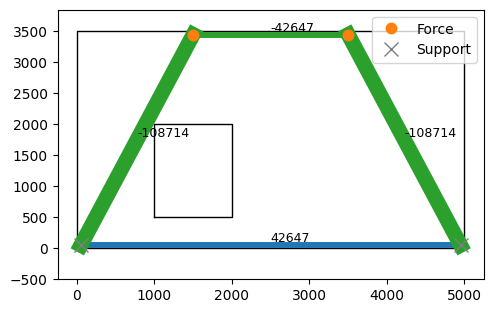

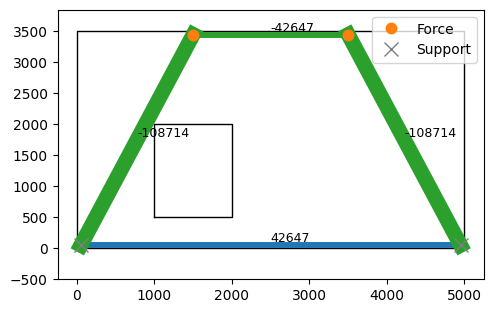

In [5]:
# geometry of the second opening
P5_2 = TS.Point(x = 1000, y = 500, z = 0)
P6_2 = TS.Point(x = 2000, y = 500, z = 0) 
P7_2 = TS.Point(x = 2000, y = 2000, z = 0) 
P8_2 = TS.Point(x = 1000, y = 2000, z = 0) 
# Opening2, clockwise
Opening2 = TS.Polygon()
Opening2.addPoint(P5_2)
Opening2.addPoint(P8_2)
Opening2.addPoint(P7_2)
Opening2.addPoint(P6_2)
T2.plotSTM(fig_size=(5.5,3.5),plot_scale=1e4, polygon_in = [Polygon], polygon_out = [Opening2], label_edges = True)

The maximum hydrostatic stress is assumed as :  20

current node: [50, 50, 0]
Hydrostatic nodal zones are assumed.

current node: [4950, 50, 0]
Hydrostatic nodal zones are assumed.

current node: [1500, 3450, 0]
Hydrostatic nodal zones are assumed.

current node: [3500, 3450, 0]
Hydrostatic nodal zones are assumed.


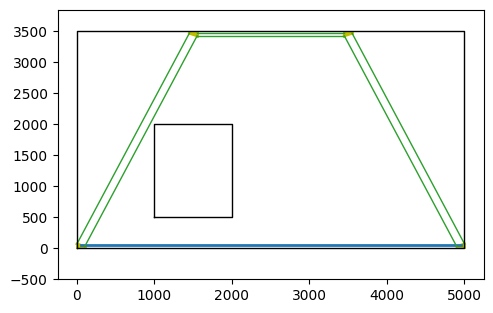

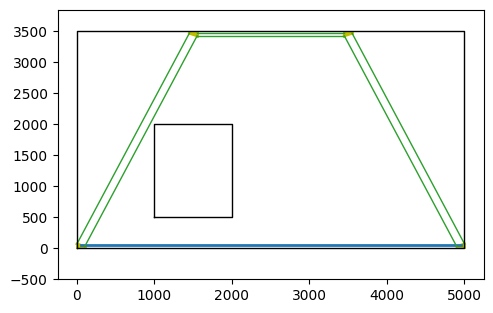

In [6]:
T2.plotStressField(fig_size=(5.5,3.5),t = 50, polygon_in=[Polygon], polygon_out = [Opening2], check_disc_points = True)